In [1]:
##imports from libraries
import pandas as pd
import numpy as np
import time
import math  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import resource
import time
from datetime import datetime
import math
import os
from sklearn import preprocessing
import sys
import cvxpy
from multiprocessing import Process, Pipe
from multiprocessing.pool import ThreadPool

## NOTE: Install keras --------------------------------------------------------------------
###------------------- keras imports for the dataset and neural network --------------------##
import keras
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras import regularizers   

%matplotlib inline


Using TensorFlow backend.


In [0]:
image_size = 28
num_features = image_size * image_size
num_classes = 10

num_train = 49000

## Load MNIST Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

11493376/11490434 [==============================] - 2s 0us/step
Train data shape: (60000, 28, 28)
Test  data shape: (10000, 28, 28)


## Data Visualization

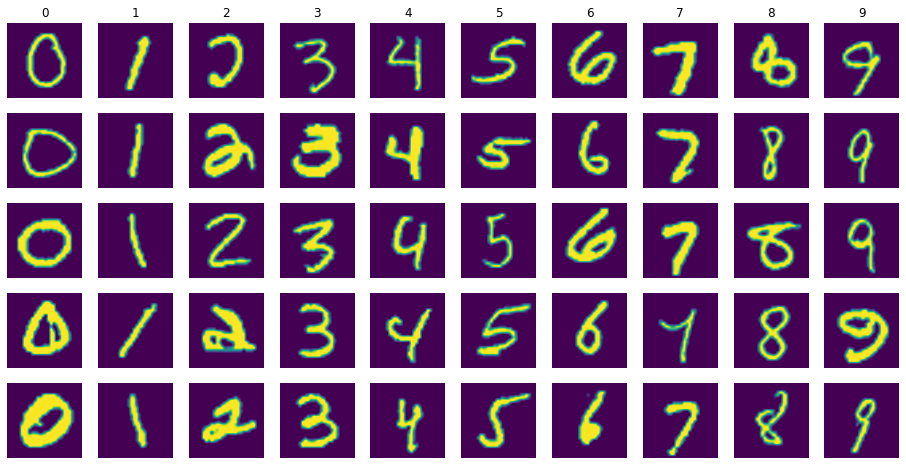

In [0]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
samples_per_class = 5

plt.figure(figsize=(16, 8))

for cls, name in enumerate(class_names):
    idxs = np.flatnonzero(y_train == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(samples_per_class, num_classes, i * num_classes + cls + 1)
        plt.imshow(X_train[idx], interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])

## Data Preprocessing

In [4]:
# Convert 3D arrays to 2D arrays
X_train =  X_train.reshape([-1, num_features])
X_test  =  X_test.reshape([-1, num_features])

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

Train data shape: (60000, 784)
Test  data shape: (10000, 784)


In [0]:
# convert pixel range from [0, 255] to [0., 1.]
X_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

mu = np.mean(X_train, axis=0)

X_train -= mu
X_train /= 255.0

x_test -= mu
x_test /= 255.0

## One-hot encodding
- We have 10 classes: 0, 1, ..., 9

In one-hot encoding, we represent labels using vectors.

```python
0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
.
.
.
9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


# Multi-layer Neural Network

### $$f(x) = W_{out} \times f(W_1 \times f(0, W_{in} x))$$

### 1 heiden layers with 400 nerouns in each layers

In [0]:
model = Sequential()

# First hidden Layer
model.add(Dense(units=400, input_shape=(num_features,)))
model.add(Activation(activation='relu'))

# Second hidden Layer
#model.add(Dense(units=200))
#model.add(Activation(activation='relu'))

# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 400)               314000    
_________________________________________________________________
activation_66 (Activation)   (None, 400)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [0]:
optimizer = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
start = time.time()
history = model.fit(X_train[:num_train], y_train[:num_train], 
                    batch_size=128, 
                    epochs=60,
                    verbose=2,
                    validation_data=(X_train[num_train:], y_train[num_train:]),
                    shuffle=True)
end = time.time()
print("Time duration for 1_HLayers_400_Neurons:",end-start)

Train on 49000 samples, validate on 11000 samples
Epoch 1/60
 - 5s - loss: 1.3269 - accuracy: 0.7123 - val_loss: 0.7894 - val_accuracy: 0.8463
Epoch 2/60
 - 4s - loss: 0.6538 - accuracy: 0.8586 - val_loss: 0.5191 - val_accuracy: 0.8816
Epoch 3/60
 - 4s - loss: 0.4882 - accuracy: 0.8820 - val_loss: 0.4199 - val_accuracy: 0.8956
Epoch 4/60
 - 4s - loss: 0.4132 - accuracy: 0.8947 - val_loss: 0.3682 - val_accuracy: 0.9048
Epoch 5/60
 - 4s - loss: 0.3689 - accuracy: 0.9031 - val_loss: 0.3352 - val_accuracy: 0.9114
Epoch 6/60
 - 5s - loss: 0.3388 - accuracy: 0.9088 - val_loss: 0.3120 - val_accuracy: 0.9154
Epoch 7/60
 - 5s - loss: 0.3163 - accuracy: 0.9135 - val_loss: 0.2941 - val_accuracy: 0.9198
Epoch 8/60
 - 5s - loss: 0.2985 - accuracy: 0.9179 - val_loss: 0.2798 - val_accuracy: 0.9227
Epoch 9/60
 - 4s - loss: 0.2838 - accuracy: 0.9216 - val_loss: 0.2678 - val_accuracy: 0.9255
Epoch 10/60
 - 4s - loss: 0.2713 - accuracy: 0.9247 - val_loss: 0.2575 - val_accuracy: 0.9274
Epoch 11/60
 - 4s -

In [0]:
model.save('Part_c_Multi_layer_NN_Model_1_Layers_400_Neurons.CA7')
#model = keras.models.load_model('Part_c_Multi_layer_NN_Model_1_Layers_400_Neurons.CA7')

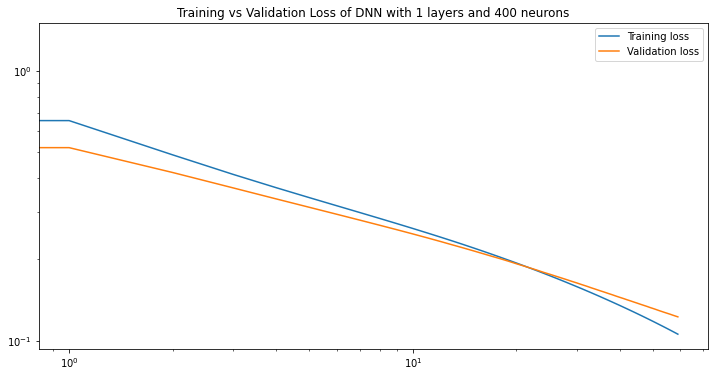

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title("Training vs Validation Loss of DNN with 1 layers and 400 neurons")
plt.show()

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label="Training acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.legend()
plt.title("Training vs Validation Accuracy of DNN with 1 layers and 400 neurons")
plt.show()

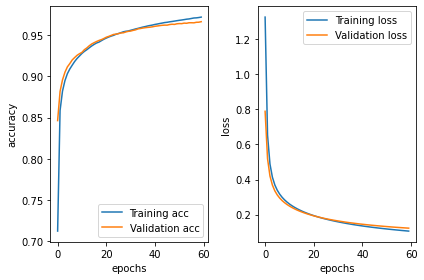

In [0]:
f, axs = plt.subplots(1,2)
axs[0].plot(history.history['accuracy'], label="Training acc")
axs[0].plot(history.history['val_accuracy'], label="Validation acc")
axs[0].legend()
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('accuracy')
axs[1].plot(history.history['loss'], label="Training loss")
axs[1].plot(history.history['val_loss'], label="Validation loss")
axs[1].legend()
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('loss')
plt.tight_layout()

In [0]:
# Select 25 random images from test images
idx = np.random.choice(X_test.shape[0], 25, replace=False)

# predict class for selected images
y_pred = model.predict_classes(X_test[idx])

# True class for selected images
y_true = y_test[idx].argmax(axis=1)

print('Test Accuracy of DNN with 1 layers and 400 neurons in each layers= %.2f' % (100.0 * np.mean(y_pred == y_true)))

Test Accuracy of DNN with 1 layers and 400 neurons in each layers= 80.00


In [0]:
fig, axes = plt.subplots(5, 5, figsize=(18, 18))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[idx[i]].reshape(image_size, image_size), interpolation='spline16')
    pred_class = class_names[y_pred[i]]
    true_class = class_names[y_true[i]]
    ax.set_xlabel('Pred: {}\nTrue: {}'.format(pred_class, true_class), fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

# Multi-layer Neural Network

### $$f(x) = W_{out} f\Bigg(W_8 f\Big(W_7 f\big(W_6 f(W_5 f(W_4 f(W_3  f(W_2  f(W_1 f(0, W_{in} x))))))\big)\Big)\Bigg)$$

### 8 heiden layers with 175 nerouns in each layers


In [0]:
model = Sequential()

n_p_layer = 175
droprate = 0.2
regparam = 1e-4
# First hidden Layer)
model.add(Dropout(droprate, input_shape=(num_features,)))
model.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model.add(Dropout(droprate, input_shape=(n_p_layer,)))
model.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model.add(Dropout(droprate, input_shape=(n_p_layer,)))
model.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model.add(Dropout(droprate, input_shape=(n_p_layer,)))
model.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model.add(Dropout(droprate, input_shape=(n_p_layer,)))
model.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model.add(Dropout(droprate, input_shape=(n_p_layer,)))
model.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))

model.add(Dropout(droprate, input_shape=(n_p_layer,)))
model.add(Dense(units=n_p_layer, 
                input_shape=(num_features,),
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam),
                activation='relu'))


# Output Layer
model.add(Dropout(0.2, input_shape=(n_p_layer,)))
model.add(Dense(units=num_classes, 
                activation='softmax',
                kernel_regularizer=regularizers.l1(regparam),
                bias_regularizer=regularizers.l1(regparam)))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 175)               137375    
_________________________________________________________________
dropout_2 (Dropout)          (None, 175)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 175)               30800     
_________________________________________________________________
dropout_3 (Dropout)          (None, 175)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 175)               30800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 175)              

### Training the model

In [0]:
optimizer = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
start = time.time()
history = model.fit(X_train[:num_train], y_train[:num_train], 
                    batch_size=128, 
                    epochs=100,
                    verbose=2,
                    validation_data=(X_train[num_train:], y_train[num_train:]),
                    shuffle=True)
end = time.time()
print("Time duration for 8_Layers_50_Neurons:",end-start)

Train on 49000 samples, validate on 11000 samples
Epoch 1/100
 - 6s - loss: 4.0488 - accuracy: 0.1149 - val_loss: 4.0304 - val_accuracy: 0.1585
Epoch 2/100
 - 5s - loss: 4.0184 - accuracy: 0.1723 - val_loss: 3.9769 - val_accuracy: 0.3066
Epoch 3/100
 - 5s - loss: 3.9051 - accuracy: 0.2516 - val_loss: 3.6262 - val_accuracy: 0.4405
Epoch 4/100
 - 5s - loss: 3.4682 - accuracy: 0.4038 - val_loss: 3.0182 - val_accuracy: 0.5937
Epoch 5/100
 - 5s - loss: 3.0145 - accuracy: 0.5414 - val_loss: 2.5552 - val_accuracy: 0.7336
Epoch 6/100
 - 5s - loss: 2.6935 - accuracy: 0.6561 - val_loss: 2.3002 - val_accuracy: 0.8132
Epoch 7/100
 - 5s - loss: 2.5029 - accuracy: 0.7353 - val_loss: 2.1510 - val_accuracy: 0.8614
Epoch 8/100
 - 5s - loss: 2.3640 - accuracy: 0.7840 - val_loss: 2.0585 - val_accuracy: 0.8914
Epoch 9/100
 - 5s - loss: 2.2762 - accuracy: 0.8138 - val_loss: 1.9960 - val_accuracy: 0.9076
Epoch 10/100
 - 5s - loss: 2.2016 - accuracy: 0.8377 - val_loss: 1.9547 - val_accuracy: 0.9151
Epoch 11/

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Training vs Validation Loss of DNN with 8 layers and 50 neurons")
plt.show()

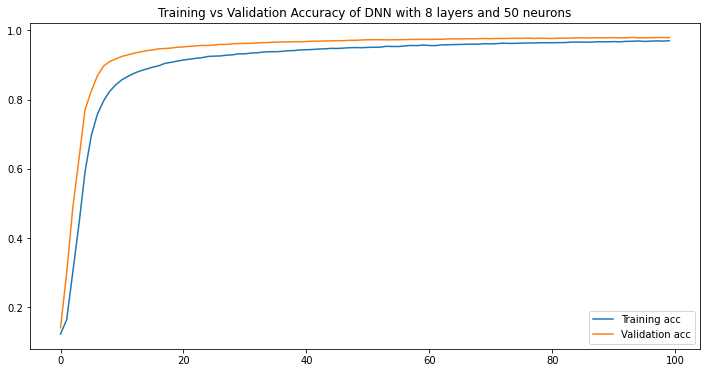

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label="Training acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.legend()
plt.title("Training vs Validation Accuracy of DNN with 8 layers and 50 neurons")
plt.show()

In [0]:
f, axs = plt.subplots(1,2)
axs[0].plot(history.history['accuracy'], label="Training acc")
axs[0].plot(history.history['val_accuracy'], label="Validation acc")
axs[0].legend()
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('accuracy')
axs[1].plot(history.history['loss'], label="Training loss")
axs[1].plot(history.history['val_loss'], label="Validation loss")
axs[1].legend()
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('loss')
plt.tight_layout()

In [0]:
# Select 25 random images from test images
idx = np.random.choice(X_test.shape[0], 25, replace=False)

# predict class for selected images
y_pred = model.predict_classes(X_test[idx])

# True class for selected images
y_true = y_test[idx].argmax(axis=1)

print('Test Accuracy of DNN with 8 layers and 50 neurons in each layers= %.2f' % (100.0 * np.mean(y_pred == y_true)))

Test Accuracy of DNN with 8 layers and 50 neurons in each layers= 76.00


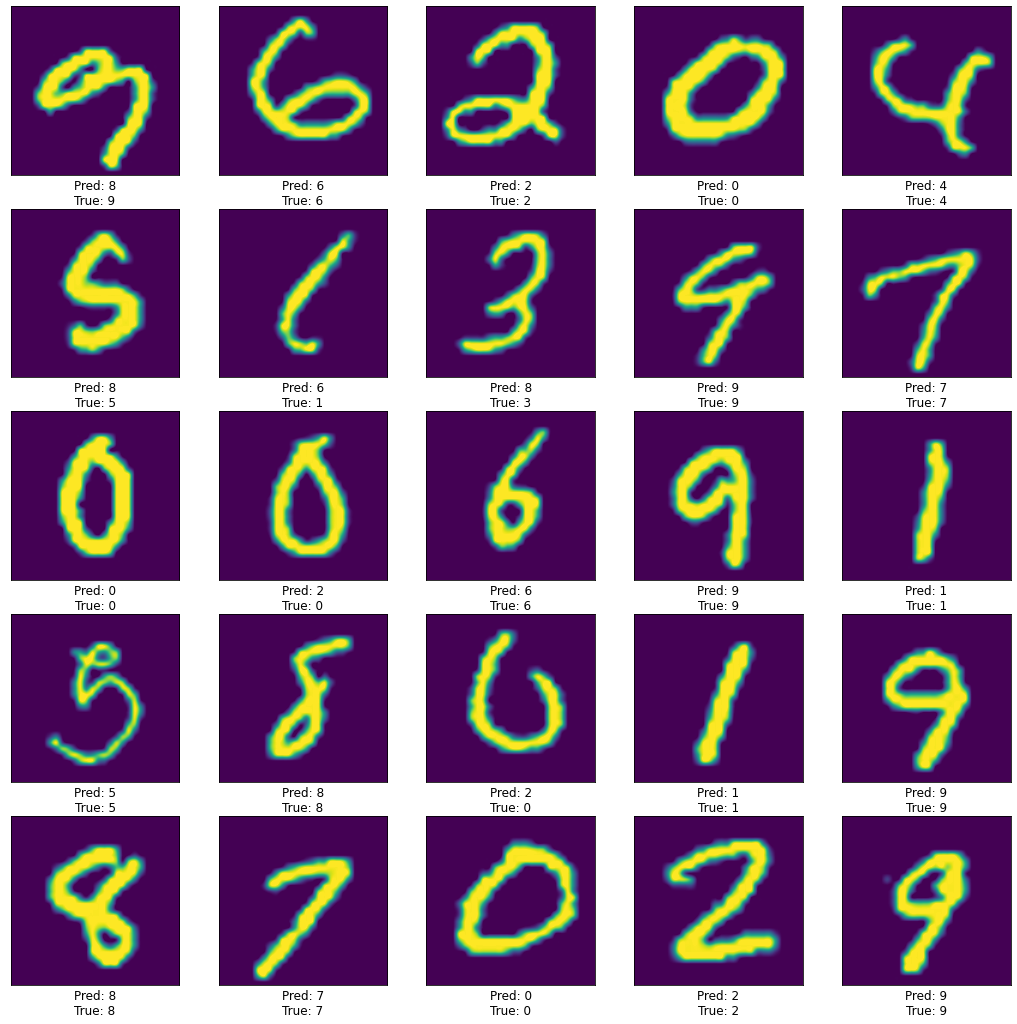

In [0]:
fig, axes = plt.subplots(5, 5, figsize=(18, 18))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[idx[i]].reshape(image_size, image_size), interpolation='spline16')
    pred_class = class_names[y_pred[i]]
    true_class = class_names[y_true[i]]
    ax.set_xlabel('Pred: {}\nTrue: {}'.format(pred_class, true_class), fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])